In [1]:
"""
Samuel Grant 2024
Look at track angle of incidence
"""

'\nSamuel Grant 2024\nLook at track angle of incidence\n'

In [2]:
# External
import os
import sys
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut
import PrintUtils as pr

In [3]:
def Plot1D(data, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", log=False, stats=True, underOver=False, errors=False, NDPI=300):
    
    data = np.array(data)
    # data = np.flatten(data)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram with outline
    counts, bin_edges, _ = ax.hist(data, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

    # Log scale 
    if log:
        ax.set_yscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    # Calculate statistics
    N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = ut.GetBasicStats(data, xmin, xmax)

    # # Create legend text
    legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}\nStd Dev: {ut.Round(stdDev, 3)}"
    if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}" + r"$\pm$" + f"{ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 3)}" + r"$\pm$" + f"{ut.Round(stdDevErr, 1)}"
    if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"

    # Add legend to the plot
    if stats: ax.legend([legendText], loc=legPos, frameon=False, fontsize=13)

    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

    # ut.ScientificNotation(ax)
    # if (ax.get_ylim()[1] > 9.999e3) or (ax.get_ylim()[1] < 9.999e-2):
    #             ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #             ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #             ax.yaxis.offsetText.set_fontsize(14)
    
    # if (ax.get_ylim()[1] > 9.999e2) or (ax.get_ylim()[1] < 9.999e-2):
    #         ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #         ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #         ax.yaxis.offsetText.set_fontsize(14)

    # plt.ticklabel_format(useOffset=False)
    
    # plt.ticklabel_format(axis='y', style='plain', useOffset=False)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    print("\n---> Written:\n\t", fout)

    # Clear memory
    plt.close()

    

    return

In [4]:
# Plot2D 
def Plot2D(x, y, nbinsX=100, xmin=-1.0, xmax=1.0, nbinsY=100, ymin=-1.0, ymax=1.0, min_box_coords=None, max_box_coords=None, box_colour="w", title=None, xlabel=None, ylabel=None, fout="hist.png", log=False, cb=True, NDPI=300):

    # Filter out empty entries from x and y
    valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

    # Extract valid data points based on the indices
    x = [x[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]

    # Check if the input arrays are not empty and have the same length
    if len(x) == 0 or len(y) == 0:
        print("Input arrays are empty.")
        return
    if len(x) != len(y):
        print("Input arrays x and y have different lengths.")
        return

    # Create 2D histogram
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

    # Set up the plot
    fig, ax = plt.subplots()

    norm = colors.Normalize(vmin=0, vmax=np.max(hist))  
    if log: norm = colors.LogNorm(vmin=1, vmax=np.max(hist)) 

    # Plot the 2D histogram
    im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)  # , vmax=np.max(hist), norm=colors.LogNorm())
    # im = ax.imshow(hist.T, extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', vmax=np.max(hist))

    # Add colourbar
    if cb: plt.colorbar(im)

    # Draw a box if min_box_coords and max_box_coords are provided
    if min_box_coords and max_box_coords:
        x_min, y_min = min_box_coords
        x_max, y_max = max_box_coords
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, linestyle="--", edgecolor=box_colour, facecolor="none")
        ax.add_patch(rect)

    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    plt.close()
    
    print("\n---> Written:\n\t", fout)

    return

In [4]:
# Get data
# fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00023/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000000.root" 
fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/81168767/00/00000/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000014.root"
finTag = fileName.split('.')[-2] 
recon="MDC2020ae"
with uproot.open(fileName) as file:
    data_ = ut.GetData(file)

In [14]:
# With fiducial area cut
def ApplyTrackerCuts(arrays_, fail=False, quiet=False, fid=True):
    
    if not quiet: print(f"\n---> Applying tracker cuts") 

    # Mark cuts on the track and track fit level
    arrays_["trkfit_KLCRV1"] = ( 
        (arrays_["trkfit"]["klfit"]["sid"] == 200) 
        & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

    arrays_["trk_bestFit"] = ( 
        (arrays_["trk"]["kl.ndof"] >= 10)
        & (arrays_["trk"]["kl.fitcon"] > 0.1)
        & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
        & (arrays_["trk"]["kl.nplanes"] >= 4)
        & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
    arrays_["trkfit_bestFit"] = ( 
        (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
        & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )
    
    # arrays_["trkfit_CRV1Fiducial"] = ( 
    #         (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 3388/2)
    #         & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) ) 

    # Measurement module
    data_["trkfit_CRV1Fiducial"] = ( 
        (abs(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 6100/2) 
        & (abs(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < (3388/2 - 127*2)) ) # Make it 2*layer offset to be  sure. 

    # arrays_["trkfit_CRV1Fiducial"] = ( 
    #     (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) <= 6100/2)
    #     & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) <= 1775.0) ) 
    
    if not fail: 
        # Create masks
        if fid: 
            arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"])]
        else:
            arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
            
        arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]
    else: 
        # Create masks
        if fid: 
            arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"])]
        else:
            arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
            
        arrays_["trk"] = arrays_["trk"][~arrays_["trk_bestFit"]]

    # Check for a track in the event after cuts.
    trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
    # Check for a track fit in the event after cuts
    trkFitCut = (
        (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
        & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    
    # Reset to event level
    trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

    # Both do the same thing, but mark them pass/fail for bookkeeping.
    if not fail: 
        arrays_["pass_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["pass_track_cuts"]]
    else: 
        arrays_["fail_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["fail_track_cuts"]]

In [12]:
def Plot2DOverlaySideBySide(side_by_side_hists_, nbinsX=100, xmin=None, xmax=None, nbinsY=100, ymin=None, ymax=None
                            , xlabels_=None, ylabels_=None, fout="hist_side_by_side.png"
                            , min_box_coords=None, max_box_coords=None, box_colour="w"
                            , log=False, cb=True, NDPI=300, legPos="best", includeBlack=False, legFontSize=12):
    
    
    # Create figure and axes (subplots side by side)
    num_hists = len(side_by_side_hists_)
    fig, axs_ = plt.subplots(1, num_hists, figsize=(6 * num_hists, 6), sharey=True)
    # Iterate over the histograms and axes
    for i, (data, ax) in enumerate(zip(side_by_side_hists_, axs_)):
        x, y, label = data

        # Filter out empty entries from x and y
        valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

        # Extract valid data points based on the indices
        x = [x[i] for i in valid_indices]
        y = [y[i] for i in valid_indices]

        # Create 2D histogram
        hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

        # Set normalization
        norm = colors.Normalize(vmin=0, vmax=np.max(hist))
        if log:
            norm = colors.LogNorm(vmin=1, vmax=np.max(hist))
        
        # Plot 2D histogram
        im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)
        
        # Add colorbar if needed
        if cb: # and i == num_hists - 1:
            cbar = plt.colorbar(im, ax=ax)
            cbar.ax.tick_params(labelsize=14)

        # Draw a box if min_box_coords and max_box_coords are provided
        if min_box_coords and max_box_coords:
            x_min, y_min = min_box_coords
            x_max, y_max = max_box_coords
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, linestyle="--", edgecolor=box_colour, facecolor="none")
            ax.add_patch(rect)
        
        # Set axis labels and titles
        ax.set_xlabel(xlabels_[i], fontsize=14, labelpad=10)
        if len(set(ylabels_)) == 1:
            if i == 0:
                ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        else:
            ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.set_ylim(ymin, ymax)
        ax.set_xlim(xmin, xmax)
        # ax.tick_params(axis='z', labelsize=14)
        
        # Set title and legend
        ax.set_title(label, fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    # Clear memory
    plt.close()
    
    print("\n---> Written:\n\t", fout)


---> Applying tracker cuts

---> Applying tracker cuts
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 14
evtinfo.eventid: 751
***** crv *****
crvcoincs.sectorType: [1]
crvcoincs.nLayers [4]
crvcoincs.angle: [0.326]
crvcoincs.pos.fCoordinates: ([-2.17e+03], [4.78e+03], [639])
crvcoincs.timeStart: [5.74e+04]
crvcoincs.time: [5.73e+04]
crvcoincs.PEs: [734]
crvcoincs.PEsPerLayer[4]: [[186, 169, 178, 201]]
crvcoincs.nHits: [16]
crvcoincsmc.pdgId: [13]
crvcoincsmc.valid: [True]
crvcoincsmc.primaryE: [2.62e+03]
***** trk *****
kl.status: [1]
kl.nactive: [15]
kl.nhits: [15]
kl.nplanes: [4]
kl.nnullambig: [0]
kl.ndof: [25]
kl.kl.fitcon: [0.897]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 5.73e+04, momerr: ..., ...}]]
klfit.sid: [[200]]
klfit.sindex: [[1]]
klfit.time: [[5.73e+04]]
klkl: [[{d0: -408, phi0: -1.17, z0: -1.22e+03, theta: 1.91, mom: 2e+03, ...}]]
klkl.z0err: [[0.12

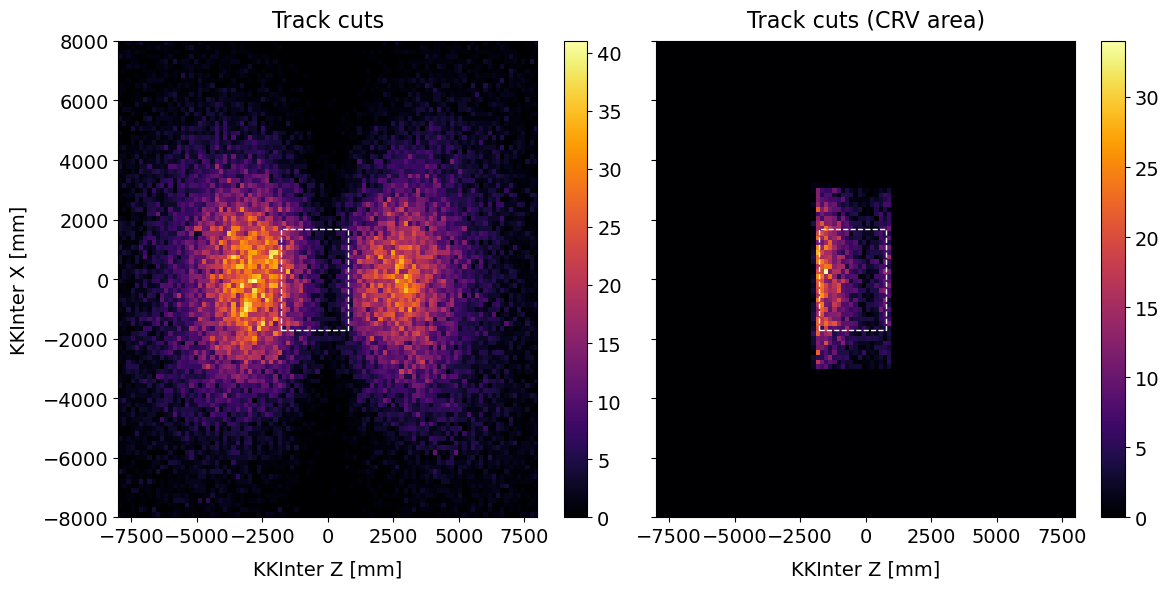


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h2_XZ_cut_sbs.png


In [15]:
# data_ = ak.copy(data_)\
no_cuts_ = ak.copy(data_)
partial_cuts_ = ak.copy(data_)
full_cuts_ = ak.copy(data_)

partial_cuts_ = ApplyTrackerCuts(partial_cuts_, fail=False, fid=False)
full_cuts_ = ApplyTrackerCuts(full_cuts_, fail=False, fid=True)

pr.PrintNEvents(full_cuts_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV1Fiducial"])

min_box_coords = (-(2570/2)-500, -(3388/2))
max_box_coords = (+(2570/2)-500, +(3388/2))

# Plot2D(x=ak.flatten(partial_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(partial_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        , title="Track cuts (CRV area)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZX_partial_cuts.png")

# Plot2D(x=ak.flatten(full_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(full_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        , title="Track cuts (CRV area)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZX_full_cuts.png")

side_by_side_hists_ = [
    (ak.flatten(partial_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(partial_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track cuts")
    ,(ak.flatten(full_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(full_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track cuts (CRV area)")
]

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "KKInter Z [mm]"],
    ylabels_=["KKInter X [mm]", "KKInter X [mm]"],
    fout=f"../Images/{recon}/TrackAngle/h2_XZ_cut_sbs.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)
# min_box_coords = (-(1775.0)-500, -(6100/2))
# max_box_coords = (+(1775.0)-500, +(6100/2))

# Plot2D(x=ak.flatten(old_track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(old_track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        , title="Old track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZX_old_track_cuts.png")

# Plot2D(x=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        , title="Track cuts (no area cut)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZX_track_cuts_no_fid.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZY_track_cuts.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_XY_track_cuts.png")

In [25]:
def Plot1DOverlay(hists_, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", NDPI=300, includeBlack=False, log=False, legFontSize=12, norm=False):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over the hists and plot each one
    for i, (label, hist) in enumerate(hists_.items()):
        colour = ut.colours[i+1]
        if not includeBlack: colour = ut.colours[i+1]
            
        # if norm:
        #     hist = hist / np.sum(hist)
            
        counts, bin_edges, _ = ax.hist(hist, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor=colour, linewidth=1.0, fill=False, density=norm, color=colour, label=label, log=log)

    # Set x-axis limits
    ax.set_xlim(xmin, xmax)
    # ax.set_ylim(1e-5, 1.2e5)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=14)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-axis tick label font size
    
    ut.ScientificNotation(ax)

    # Add legend to the plot
    ax.legend(loc=legPos, frameon=False, fontsize=legFontSize) #, bbox_to_anchor=(0.90, 0.01))

    # plt.ticklabel_format(useOffset=False)
    # plt.ticklabel_format(axis='y', style='plain', useOffset=False)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)
    
    return

In [8]:
def Plot1DOverlaySideBySide(side_by_side_hists_, nbins=100, xmin=None, xmax=None, xlabels_=None, ylabels_=None, fout="hist_side_by_side.png", legPos="best", NDPI=300, includeBlack=False, log=False, legFontSize=12, norm=False):
    
    # Create figure and axes (3 subplots side by side)
    fig, axs_ = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, (hists_, ax) in enumerate(zip(side_by_side_hists_, axs_)):
        
        # Set default x-axis limits if not provided
        if xmin is None: xmin = min([np.min(hist) for hist in hists_.values()])
        if xmax is None: xmax = max([np.max(hist) for hist in hists_.values()])

        # Iterate over the hists and plot each one
        for j, (label, hist) in enumerate(hists_.items()):
            colour = ut.colours[j+1]
            if not includeBlack: colour = ut.colours[j+1]
            
            # Plot histogram
            ax.hist(hist, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor=colour, linewidth=1.0, fill=False, density=norm, color=colour, label=label, log=log)
        
        # Set x-axis limits
        ax.set_xlim(xmin, xmax)
        
        # Set titles, labels and other properties
        ax.set_xlabel(xlabels_[i], fontsize=14, labelpad=10) 
        
        if len(set(ylabels_)) == 1:
            if i == 0: 
                ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        else: 
            ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend(loc=legPos, frameon=False, fontsize=legFontSize)
        
        # Apply scientific notation if needed
        ut.ScientificNotation(ax)
    
    plt.tight_layout()
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    # Clear memory
    plt.close()
    
    print("\n---> Written:\n\t", fout)

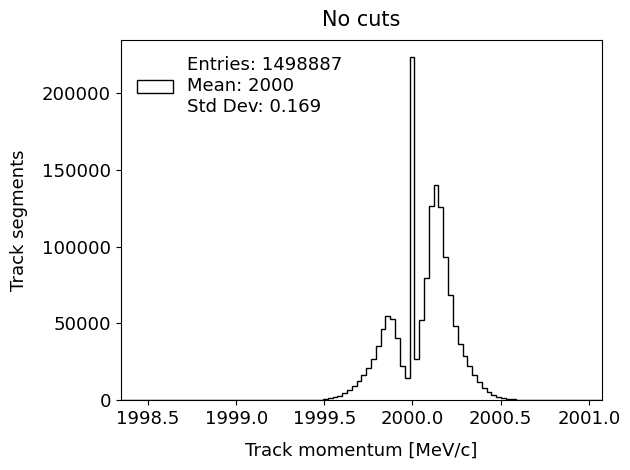


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h1_ptot_no_cuts.png


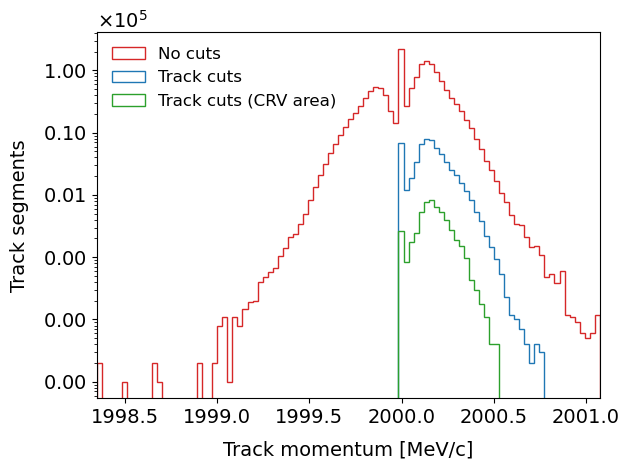


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h1_ptot_cut_overlay.png


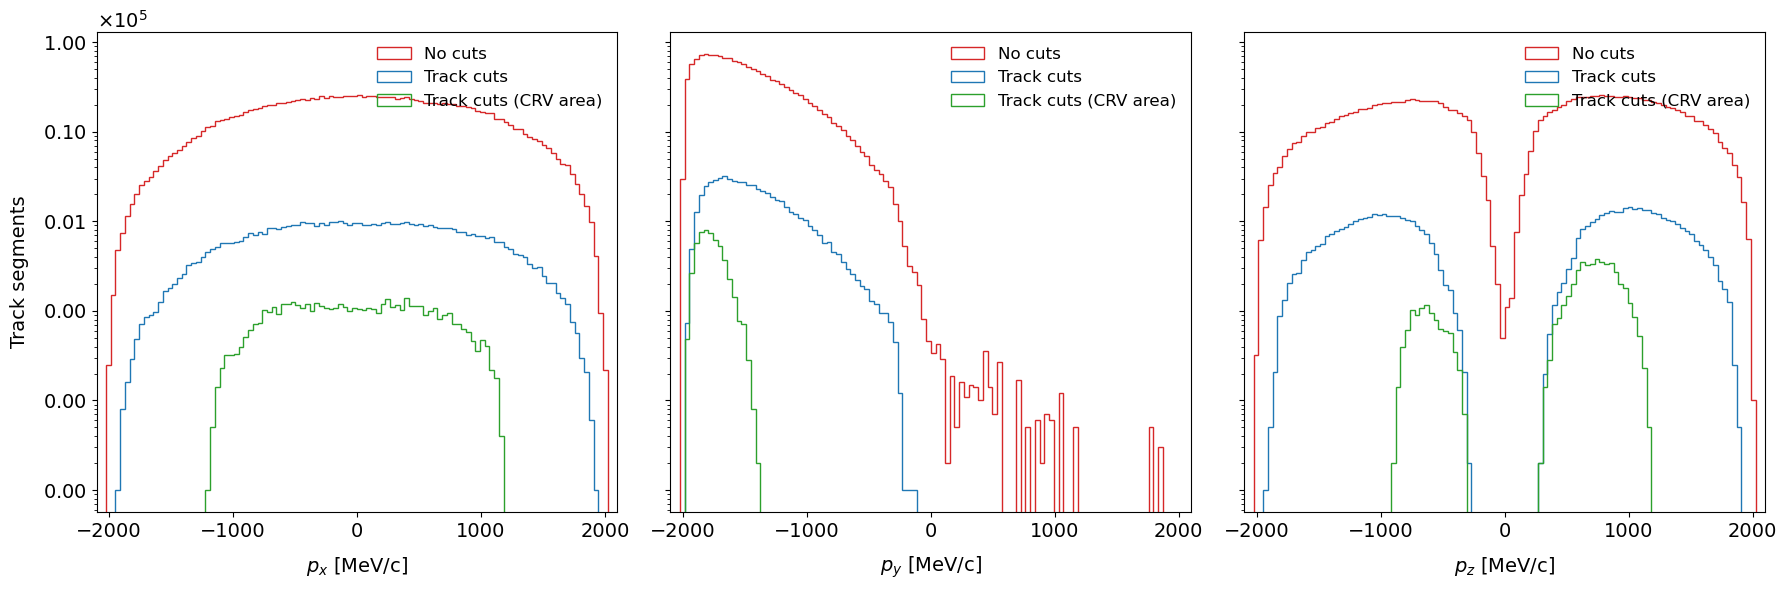


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h1_ptot_overlay.png


In [17]:
# Set up momentum
px_no_cuts_ = ak.flatten(no_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_no_cuts_ = ak.flatten(no_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_no_cuts_ = ak.flatten(no_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_no_cuts_ = np.sqrt( px_no_cuts_**2 + py_no_cuts_**2 + pz_no_cuts_**2 )

px_partial_cuts_ = ak.flatten(partial_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_partial_cuts_ = ak.flatten(partial_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_partial_cuts_ = ak.flatten(partial_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_partial_cuts_ = np.sqrt( px_partial_cuts_**2 + py_partial_cuts_**2 + pz_partial_cuts_**2 )

px_full_cuts_ = ak.flatten(full_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_full_cuts_ = ak.flatten(full_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_full_cuts_ = ak.flatten(full_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_full_cuts_ = np.sqrt( px_full_cuts_**2 + py_full_cuts_**2 + pz_full_cuts_**2 )

Plot1D(ptot_no_cuts_
       , nbins=100, xmin=np.min(ptot_no_cuts_), xmax=np.max(ptot_no_cuts_)
       , title="No cuts", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
       , fout=f"../Images/{recon}/TrackAngle/h1_ptot_no_cuts.png")

Plot1DOverlay({"No cuts" : ptot_no_cuts_, "Track cuts" : ptot_partial_cuts_, "Track cuts (CRV area)" : ptot_full_cuts_}
              , nbins=100, xmin=np.min(ptot_no_cuts_), xmax=np.max(ptot_no_cuts_)
              , xlabel="Track momentum [MeV/c]", ylabel="Track segments" # (normalised)"
              , fout=f"../Images/{recon}/TrackAngle/h1_ptot_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="upper left")

# Plot1DOverlay({"No cuts" : px_raw_, "Track cuts" : px_cut_, "Track cuts (no area cut)" : px_cut_no_fid_}
#               , nbins=100, xmin=np.min(px_raw_), xmax=np.max(px_raw_)
#               , xlabel="$p_{x}$ [MeV/c]", ylabel="Track segments"# (normalised)"
#               , fout=f"../Images/{recon}/TrackAngle/h1_trkMomX_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="best")

# Plot1DOverlay({"No cuts" : py_raw_, "Track cuts" : py_cut_, "Track cuts (no area cut)" : py_cut_no_fid_}
#               , nbins=100, xmin=np.min(py_raw_), xmax=np.max(py_raw_)
#               , xlabel="$p_{y}$ [MeV/c]", ylabel="Track segments" # (normalised)"
#               , fout=f"../Images/{recon}/TrackAngle/h1_trkMomY_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="best")

# Plot1DOverlay({"No cuts" : pz_raw_, "Track cuts" : pz_cut_, "Track cuts (no area cut)" : pz_cut_no_fid_}
#               , nbins=100, xmin=np.min(pz_raw_), xmax=np.max(pz_raw_)
#               , xlabel="$p_{z}$ [MeV/c]", ylabel="Track segments" # (normalised)"
#               , fout=f"../Images/{recon}/TrackAngle/h1_trkMomZ_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="upper left")


hists_ = [
    {"No cuts": px_no_cuts_, "Track cuts": px_partial_cuts_, "Track cuts (CRV area)": px_full_cuts_},
    {"No cuts": py_no_cuts_, "Track cuts": py_partial_cuts_, "Track cuts (CRV area)": py_full_cuts_},
    {"No cuts": pz_no_cuts_, "Track cuts": pz_partial_cuts_, "Track cuts (CRV area)": pz_full_cuts_}
]

Plot1DOverlaySideBySide(
    hists_,
    nbins=110,
    xmin=-2100,
    xmax=2100,
    xlabels_=["$p_{x}$ [MeV/c]", "$p_{y}$ [MeV/c]", "$p_{z}$ [MeV/c]"],
    ylabels_=["Track segments"],
    fout=f"../Images/{recon}/TrackAngle/h1_ptot_overlay.png",
    log=True,
    legPos="upper right"
)

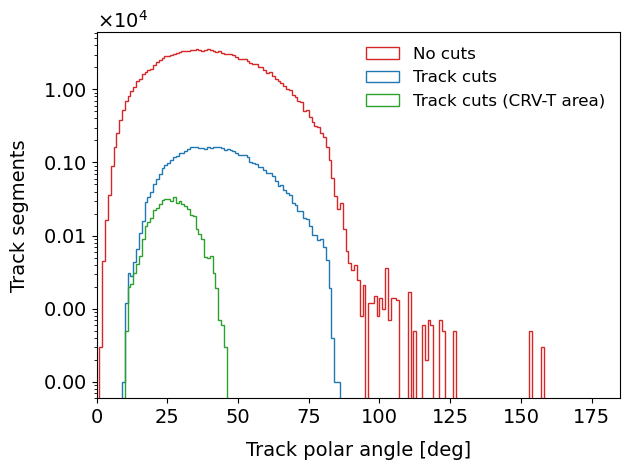


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h1_theta_cut_overlay.png

    ************************
    Minimum angle: 10.0 deg
    Maximum angle: 45.5 deg
    ************************
    


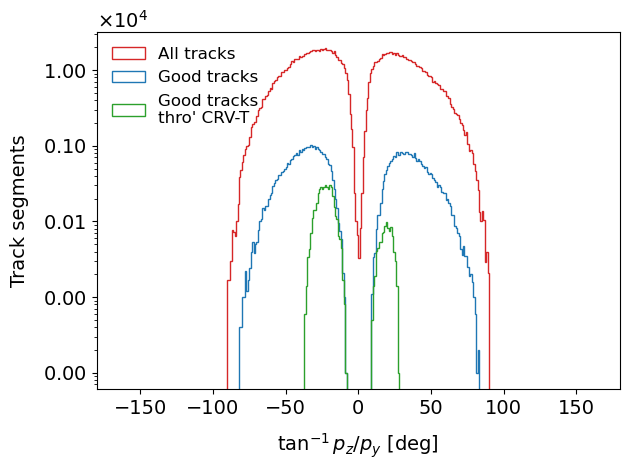


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h1_alpha_cut_overlay.png


In [47]:
# Angles
theta_no_cuts_ = np.arccos(-py_no_cuts_ / ptot_no_cuts_) 
theta_partial_cuts_ = np.arccos(-py_partial_cuts_ / ptot_partial_cuts_) 
theta_full_cuts_ = np.arccos(-py_full_cuts_ / ptot_full_cuts_) 

Plot1DOverlay({"No cuts" : np.degrees(theta_no_cuts_), "Track cuts" : np.degrees(theta_partial_cuts_), "Track cuts (CRV-T area)" : np.degrees(theta_full_cuts_)}
              , nbins=185, xmin=0, xmax=185
              , xlabel=r"Track polar angle [deg]", ylabel="Track segments"
              , fout=f"../Images/{recon}/TrackAngle/h1_theta_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="upper right")


outputStr = f"""
    ************************
    Minimum angle: {np.min(np.degrees(theta_full_cuts_)):.1f} deg
    Maximum angle: {np.max(np.degrees(theta_full_cuts_)):.1f} deg
    ************************
    """

print(outputStr)

alpha_no_cuts_ = np.arctan(pz_no_cuts_ / py_no_cuts_) 
alpha_partial_cuts_ = np.arctan(pz_partial_cuts_ / py_partial_cuts_) 
alpha_full_cuts_ = np.arctan(pz_full_cuts_ / py_full_cuts_) 


# Plot1DOverlay({"No cuts" : np.degrees(alpha_no_cuts_), "Track cuts" : np.degrees(alpha_partial_cuts_), "Track cuts (CRV area)" : np.degrees(alpha_full_cuts_)}
#               , nbins=360, xmin=-180, xmax=180
#               , xlabel=r"$\tan^{-1}{p_{z}/p_{y}}$ [deg]", ylabel="Track segments"
#               , fout=f"../Images/{recon}/TrackAngle/h1_alpha_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="upper left")

Plot1DOverlay({"All tracks" : np.degrees(alpha_no_cuts_), "Good tracks" : np.degrees(alpha_partial_cuts_), "Good tracks\nthro' CRV-T" : np.degrees(alpha_full_cuts_)}
              # , nbins=420, xmin=-210, xmax=210, 
              , nbins=360, xmin=-180, xmax=180
              , xlabel=r"$\tan^{-1}{p_{z}/p_{y}}$ [deg]", ylabel="Track segments"
              , fout=f"../Images/{recon}/TrackAngle/h1_alpha_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="upper left")



In [13]:

# alpha_raw_ = np.arccos(pz_raw_ / ptot_raw_) 
# alpha_cut_ = np.arccos(pz_cut_ / ptot_cut_) 
# alpha_old_cut_ = np.arccos(abs(pz_old_cut_) / ptot_old_cut_) 
# alpha_cut_no_fid_ = np.arccos(pz_cut_no_fid_ / ptot_cut_no_fid_) 

# beta_raw_ = np.arcsin(px_raw_ / ptot_raw_) 
# beta_cut_ = np.arcsin(px_cut_ / ptot_cut_) 
# beta_cut_no_fid_ = np.arcsin(px_cut_no_fid_ / ptot_cut_no_fid_) 

# delta_raw_ = np.arccos( np.sqrt(px_raw_**2 + pz_raw_**2) / ptot_raw_) 
# delta_cut_ = np.arccos( np.sqrt(px_cut_**2 + pz_cut_**2)  / ptot_cut_) 
# delta_old_cut_ = np.arccos( np.sqrt(px_old_cut_**2 + pz_old_cut_**2)  / ptot_old_cut_) 
# delta_cut_no_fid_ = np.arccos( np.sqrt(px_cut_no_fid_**2 + pz_cut_no_fid_**2) / ptot_cut_no_fid_) 

# phi_raw_ = np.arctan2(py_raw_, px_raw_) 
# phi_cut_ = np.arctan2(py_cut_, px_cut_) 
# phi_cut_no_fid_ = np.arctan2(py_cut_no_fid_, px_cut_no_fid_) 

# Plot1D(np.degrees(alpha_old_cut_)
#       , nbins=90, xmin=0, xmax=90
#       , title = "CRV-T fiducial area", xlabel=r"$|p_{z}|/|p|$ [deg]", ylabel="Track segments"
#       , fout=f"../Images/{recon}/TrackAngle/h1_alpha_CRVT.png"
#       # , norm=True
#       , log=True
#       , legPos="best")


# Find these events 



# Plot1DOverlay({"No cuts" : np.degrees(alpha_raw_), "Track cuts" : np.degrees(alpha_cut_), "Track cuts (no area cut)" : np.degrees(alpha_cut_no_fid_)}
#               , nbins=180, xmin=0, xmax=180
#               , xlabel=r"Angle of incidence, $\cos^{-1}{p_{z}/|p|}$ [deg]", ylabel="Track segments"
#               , fout=f"../Images/{recon}/TrackAngle/h1_alpha_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="upper right")

# Plot1DOverlay({"No cuts" : np.degrees(beta_raw_), "Track cuts" : np.degrees(beta_cut_), "Track cuts (no area cut)" : np.degrees(beta_cut_no_fid_)}
#               , nbins=180, xmin=0, xmax=180
#               , xlabel=r"Angle of incidence, $\cos^{-1}{p_{x}/|p|}$ [deg]", ylabel="Track segments"
#               , fout=f"../Images/{recon}/TrackAngle/h1_beta_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="upper right")

# Plot1DOverlay({"No cuts" : np.degrees(delta_raw_), "Track cuts" : np.degrees(delta_cut_), "Track cuts (no area cut)" : np.degrees(delta_cut_no_fid_)}
#               , nbins=90, xmin=0, xmax=90
#               , xlabel=r"Angle of incidence [deg]", ylabel="Track segments"
#               , fout=f"../Images/{recon}/TrackAngle/h1_delta_cut_overlay.png"
#               # , norm=True
#               , log=True
#               , legPos="upper left")


# Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , y=theta_raw_
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=np.min(theta_raw_), ymax=np.max(theta_raw_)
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="Polar angle [rad]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_x_vs_theta_raw.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , y=theta_cut_
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=np.min(theta_cut_), ymax=np.max(theta_cut_)
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="Polar angle [rad]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_x_vs_theta_track_cuts.png")

# Plot1DOverlay({"No cuts" : phi_raw_, "Track cuts" : phi_cut_, "Track cuts (no area cut)" : phi_cut_no_fid_}
#               , nbins=100, xmin=np.min(phi_raw_), xmax=np.max(phi_raw_)
#               , xlabel="Azimuthal angle [rad]", ylabel="Track segments"
#               , fout=f"../Images/{recon}/TrackAngle/h1_trkPhi_cut_overlay.png"
#               , log=True
#               , legPos="best")

In [14]:
"""
Test event
"""
test_event = track_cuts_[(track_cuts_["evt"]["evtinfo.run"] == 1205) & (track_cuts_["evt"]["evtinfo.subrun"] == 14) & (track_cuts_["evt"]["evtinfo.event"] == 10780)]
pr.PrintNEvents(test_event, 100) 
px = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)[0]
py = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)[0]
pz = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)[0]
ptot = np.sqrt( px**2 + py**2 + pz**2 )
print(f"px : {px} MeV, py : {py} MeV, pz : {pz} MeV")
print(f"ptot : {ptot} MeV")
alpha = np.arccos(pz / ptot) 
beta = np.arcsin(px / ptot) 
delta = np.arccos( np.sqrt(px**2 + pz**2) / ptot) 
print(f"py/pz = {np.degrees(np.arctan(py/pz))} deg")
print(f"py/px = {np.degrees(np.arctan(py/px))} deg")
print(f"px/ptot = {np.degrees(beta)} deg")
print(f"pz/ptot = {np.degrees(alpha)} deg")
print(f"pxz/ptot = {np.degrees(delta)} deg")


print(f"px/ptot = {np.degrees(beta)} deg")
print(f"pz/ptot = {np.degrees(alpha)} deg")
print(f"pxz/ptot = {np.degrees(delta)} deg")

NameError: name 'track_cuts_' is not defined

In [ ]:
# Plot the tracker and CRV fiduial area 

def ApplyCommonAreaCut(arrays_, quiet=False, fail=False):
    
    if not quiet: print(f"\n---> Applying common area cuts") 

    # Mark cuts on the track and track fit level
    arrays_["trk_bestFit"] = ( 
        (arrays_["trk"]["kl.ndof"] >= 10)
        & (arrays_["trk"]["kl.fitcon"] > 0.1)
        & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
        & (arrays_["trk"]["kl.nplanes"] >= 4)
        & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
    arrays_["trkfit_bestFit"] = ( 
        (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
        & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )
    
    arrays_["trkfit_CRV1Fiducial"] = ( 
            (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 3388/2)
            & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) ) 

    arrays_["trkfit_KLCRV1"] = ( 
            (arrays_["trkfit"]["klfit"]["sid"] == 200) 
            & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )
    
    arrays_["trkfit_KLTRK"] = ( 
            (arrays_["trkfit"]["klfit"]["sid"] == 4)
            & (arrays_["trkfit"]["klfit"]["sindex"] == 0) )

    # arrays_["trkfit_common"] = (
    #     ( 
    #         (arrays_["trkfit"]["klfit"]["sid"] == 200) 
    #         & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )
    #     |   (arrays_["trkfit"]["klfit"]["sid"] == 4) 
    #         & (arrays_["trkfit"]["klfit"]["sindex"] == 0) )

    # Track segements that pass passes KLCRV1 and the fiducial cut or track segments that pass through the tracker
    # Must have a least two segments left at the end
    
    arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & ( (arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"]) | arrays_["trkfit_KLTRK"]))] 
    arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]

    # Check for a track in the event after cuts.
    trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
    
    # Check for multiple track fits in the event after cuts
    trkFitCut = ak.any(arrays_["trkfit"]["klfit"]["sid"] == 200, axis=-1, keepdims=False) & ak.any(arrays_["trkfit"]["klfit"]["sid"] == 4, axis=-1, keepdims=False)

    # Reset to event level
    trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

    # Both do the same thing, but mark them pass/fail for bookkeeping.
    if not fail: 
        arrays_["pass_common_area_cut"] = (trkCut & trkFitCut)
        return arrays_[arrays_["pass_common_area_cut"]]
    else: 
        arrays_["fail_common_area_cut"] = (trkCut & trkFitCut)
        return arrays_[arrays_["fail_common_area_cut"]]

In [ ]:
"""
A vertical track
"""

# px = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)[0]
# py = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)[0]
# pz = ak.flatten(test_event["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)[0]

test_data_ = ak.copy(data_)

test_data_["trkfit_delta"] = ( 
    np.arccos ( np.sqrt( test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"]**2 + test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"]**2 ) 
               / np.sqrt( test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"]**2 + test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"]**2 + test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"]**2 )
              )
)

test_data_["trkfit_alpha"] = ( 
    np.arctan ( test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"] / test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"] ) 
)
             

test_data_["trkfit_beta"] = ( 
    np.arctan ( test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"] / test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"] ) 
            
)


Plot1D(np.degrees(ak.flatten(test_data_["trkfit_delta"], axis=None))
      , nbins=90, xmin=0, xmax=90
      , title="With track cuts", xlabel=r"Anlge of incidence [deg]", ylabel="Track segments"
      , fout=f"../Images/{recon}/TrackAngle/h1_angle_test.png"
      # , norm=True
      , log=True
      , legPos="best")


test_data_["trkfit"] = test_data_["trkfit"][test_data_["trkfit_delta"] == np.max(test_data_["trkfit_delta"]) ] 

# data_
print(np.max(test_data_["trkfit_delta"]), np.degrees(np.max(test_data_["trkfit_delta"])))
print(f"mom : ({ak.flatten(test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)[0]}, {ak.flatten(test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)[0]}, {ak.flatten(test_data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)[0]})")
print(f"pos : ({ak.flatten(test_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[0]}, {ak.flatten(test_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[0]}, {ak.flatten(test_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[0]})")

trkCut = ak.any(test_data_["trk"]["kl.status"], axis=1, keepdims=False) > 0
trkFitCut = ak.count(test_data_["trkfit"]["klfit"]["sid"], axis=2, keepdims=False) > 0
# Reset to event level
trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

pr.PrintNEvents(test_data_[trkCut & trkFitCut], masks_ = ["trkfit_delta", "trkfit_beta", "trkfit_alpha"])




# data_ = data_["trkfit"][["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"]



In [ ]:
x_track_cuts_ = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
y_track_cuts_  = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
z_track_cuts_ = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
length=-1

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
       , y=np.degrees(delta_raw_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter Z [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Zdelta_raw.png")

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
       , y=np.degrees(delta_raw_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter X [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Xdelta_raw.png")


Plot2D(x=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
       , y=np.degrees(delta_cut_no_fid_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter Z [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Zdelta_track_cuts_no_fid.png")

Plot2D(x=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
       , y=np.degrees(delta_cut_no_fid_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter X [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Xdelta_track_cuts_no_fid_.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
       , y=np.degrees(delta_cut_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter Z [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Zdelta_track_cuts.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
       , y=np.degrees(delta_cut_)[:length]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=90, ymin=0, ymax=90
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter X [mm]", ylabel="Angle of incidence [deg]"
       , fout=f"../Images/{recon}/TrackAngle/h2_Xdelta_track_cuts.png")


# side_by_side_hists_ = [
#     (x_track_cuts_, np.degrees(delta_cut_), "x")
#     # (y_track_cuts_, np.degrees(delta_track_cuts_)),
#     ,(z_track_cuts_, np.degrees(delta_cut_), "y")
# ]

# Plot2DOverlaySideBySide(
#     side_by_side_hists_=side_by_side_hists_,
#     nbinsX=100,
#     xmin=-4000, xmax=4000,
#     nbinsY=90,
#     ymin=0, ymax=90,
#     xlabels_=["KKInter X [mm]", "KKInter Z [mm]"],
#     ylabels_=["Angle of incidence [deg]"],
#     fout=f"../Images/{recon}/TrackAngle/h2_pos_delta_overlay.png",
#     log=False,
#     cb=True,
#     NDPI=300,
#     legFontSize=12
# )


In [ ]:
common_area_ = ak.copy(data_)
common_area_ = ApplyCommonAreaCut(common_area_, fail=False)

pr.PrintNEvents(common_area_, 1)

length=-1

Plot2D(x=ak.flatten(common_area_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
       , y=ak.flatten(common_area_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
       , nbinsX=100, xmin=-3500, xmax=3500, nbinsY=100, ymin=-2000, ymax=5500
       , xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackAngle/h2_XY_common.png"
       , log=False)

Plot2D(x=ak.flatten(common_area_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
       , y=ak.flatten(common_area_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
       , nbinsX=100, xmin=-3500, xmax=3500, nbinsY=100, ymin=-2000, ymax=5500
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackAngle/h2_ZY_common.png")


In [ ]:
""" 
Minimum angle of incidence 

Of this subset within the common area, which has the maximum angle of incidence? 

"""

